# 🚗 Used Car Price Prediction Project

## 📌 Introduction

In this project, we aim to predict the selling price of used cars using machine learning models. The dataset contains various features such as kilometers driven, year of manufacture, fuel type, owner type, etc. Our goal is to build a regression model that can accurately estimate car prices, helping potential buyers and sellers to make informed decisions.


In [77]:

import pandas as pd
import numpy as np


df = pd.read_csv("bikes.csv")

df.head()


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [78]:

print(df.info())


print(df.nunique())


print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB
None
model_name    1724
model_year      36
kms_driven    1801
owner            4
location       561
mileage        117
power          272
price         1627
dtype: int64
        model_year         price
count  7857.000000  7.857000e+03
mean   2015.367698  1.067913e+05
std       4.001443  1.389261e+05
min    1950.000000  0.000000e+00
25%    2014.000000  4.200000e+04
50%    2016.000000  7.500000e+04
75%    2018.000000  1.250000e+05
max    2

## 🧹 Data Preprocessing

Data cleaning involved:
- Handling missing values.
- Converting categorical features into numerical format using label encoding.
- Feature selection and reordering: ['power', 'km_driven', 'model_year', 'mileage', 'owner'].

We also scaled the data where necessary to improve model performance.


In [79]:

df.drop_duplicates(inplace=True)


print("Missing values:\n", df.isnull().sum())


df.dropna(subset=['power', 'mileage', 'location'], inplace=True)


print("\nAfter cleaning:\n", df.isnull().sum())


Missing values:
 model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

After cleaning:
 model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64


In [80]:
# Step 1: Remove everything that's not a digit
df['kms_driven'] = df['kms_driven'].str.replace(r'[^\d]', '', regex=True)

# Step 2: Replace empty strings with NaN
df['kms_driven'] = df['kms_driven'].replace('', np.nan)

# Step 3: Drop rows where 'kms_driven' is still NaN
df.dropna(subset=['kms_driven'], inplace=True)

# Step 4: Convert to integer
df['kms_driven'] = df['kms_driven'].astype(int)

# Final check
print(df['kms_driven'].head())
print(df['kms_driven'].dtype)


0    17000
1    50000
2    14795
3       28
4     2000
Name: kms_driven, dtype: int64
int64


In [81]:
df['mileage']=df['mileage'].str.extract(r'(\d+\.\d+|\d+)')
df['mileage']=df['mileage'].astype(float)
print(df['mileage'].head())
print(df['mileage'].dtype)

0    35.0
1    35.0
2    30.0
3    28.0
4     NaN
Name: mileage, dtype: float64
float64


In [82]:
avg_mileage=df['mileage'].mean()
df['mileage'].fillna(avg_mileage,inplace=True)

C:\Users\krish\AppData\Local\Temp\ipykernel_24012\1719356753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(avg_mileage,inplace=True)


In [83]:
df=df.dropna(subset=['mileage'])

In [84]:
df['power']=df['power'].str.extract(r'(\d+\.\d+|\d+)')
df.dropna(subset=['power'],inplace=True)
df['power']=df['power'].astype(float)
print(df['power'].head())
print(df['power'].dtype)

0    19.0
1    19.8
2    28.0
3    34.5
4    30.0
Name: power, dtype: float64
float64


In [85]:
import pandas as pd
import numpy as np


df = pd.read_csv("bikes.csv")



In [86]:

df['kms_driven'] = df['kms_driven'].astype(str)


df = df[~df['kms_driven'].str.contains("Mileage", case=False, na=False)]


df['kms_driven'] = df['kms_driven'].str.replace(r'[^\d]', '', regex=True)
df['kms_driven'] = df['kms_driven'].replace('', np.nan)
df.dropna(subset=['kms_driven'], inplace=True)
df['kms_driven'] = df['kms_driven'].astype(int)


In [87]:

df['mileage'] = df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')
df['mileage'] = df['mileage'].replace('', np.nan).astype(float)


In [88]:

df['power'] = df['power'].astype(str).str.extract(r'(\d+\.?\d*)')
df['power'] = df['power'].replace('', np.nan).astype(float)


In [89]:
df.to_csv("bikes_cleaned.csv", index=False)


In [90]:
df = pd.read_csv("bikes_cleaned.csv")


In [91]:

df_raw = pd.read_csv("bikes.csv")

print(df_raw['mileage'].unique()[:20])


['\n\n 35 kmpl' '\n\n 30 kmpl' '\n\n 28 Kms' '\n\n ' '\n\n 65 kmpl'
 '\n\n 40 Kmpl' '\n\n 25 kmpl' '\n\n 58 Kmpl' '\n\n 32 kmpl'
 '\n\n 40 kmpl' '\n\n 65 Kmpl' '\n\n 30 Kmpl' '\n\n 42 Kmpl'
 '\n\n 37 Kmpl' '\n\n 37 kmpl' '\n\n 60 Kmpl' '\n\n 53 kmpl'
 '\n\n 55 kmpl' '\n\n 45 kmpl' '\n\n 38 kmpl']


In [92]:
print(df['owner'].unique())


['first owner' 'third owner' 'second owner' 'fourth owner or more']


In [93]:
df['owner'] = df['owner'].astype(str).str.lower().str.strip()


In [94]:
owner_map = {
    'first owner': 1,
    'second owner': 2,
    'third owner': 3,
    'fourth owner or more': 4
}

df['owner'] = df['owner'].map(owner_map)


In [95]:
df.dropna(subset=['owner'], inplace=True)
df['owner'] = df['owner'].astype(int)


In [96]:
df.to_csv("bikes_cleaned.csv", index=False)

In [97]:
df.shape
df.head()


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000,1,hyderabad,35.0,19.0,63500
1,Royal Enfield Classic 350cc 2016,2016,50000,1,hyderabad,35.0,19.8,115000
2,Hyosung GT250R 2012,2012,14795,1,hyderabad,30.0,28.0,300000
3,Jawa Perak 330cc 2020,2020,2000,1,bangalore,NaN,30.0,197500
4,KTM Duke 200cc 2012,2012,24561,3,bangalore,35.0,25.0,63400


In [98]:
df = pd.read_csv("bikes.csv") 


In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv("bikes.csv")  # Load original raw file


In [100]:
df['kms_driven'] = df['kms_driven'].astype(str)
df = df[~df['kms_driven'].str.contains("mileage", case=False, na=False)]
df['kms_driven'] = df['kms_driven'].str.replace(r'[^\d]', '', regex=True)
df['kms_driven'] = df['kms_driven'].replace('', np.nan)
df.dropna(subset=['kms_driven'], inplace=True)
df['kms_driven'] = df['kms_driven'].astype(int)


In [101]:
df['mileage'] = df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')
df['mileage'] = df['mileage'].replace('', np.nan).astype(float)


In [102]:
df['power'] = df['power'].astype(str).str.extract(r'(\d+\.?\d*)')
df['power'] = df['power'].replace('', np.nan).astype(float)


In [103]:
df['owner'] = df['owner'].astype(str).str.lower().str.strip()

owner_map = {
    'first owner': 1,
    'second owner': 2,
    'third owner': 3,
    'fourth owner or more': 4
}

df['owner'] = df['owner'].map(owner_map)
df.dropna(subset=['owner'], inplace=True)
df['owner'] = df['owner'].astype(int)


In [104]:
df.to_csv("bikes_cleaned.csv", index=False)  # Main save
df.to_csv("bikes_cleaned_backup.csv", index=False)  # Safety backup


In [105]:
print(df.shape)
df.head()


(5869, 8)


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000,1,hyderabad,35.0,19.0,63500
1,Royal Enfield Classic 350cc 2016,2016,50000,1,hyderabad,35.0,19.8,115000
2,Hyosung GT250R 2012,2012,14795,1,hyderabad,30.0,28.0,300000
4,Jawa Perak 330cc 2020,2020,2000,1,bangalore,NaN,30.0,197500
5,KTM Duke 200cc 2012,2012,24561,3,bangalore,35.0,25.0,63400


## 📊 Exploratory Data Analysis

Here, we analyze the data using visualizations and summary statistics to understand patterns, outliers, and relationships between features.

- Boxplots and scatterplots were used to identify outliers.
- Distribution plots helped us understand the skewness in data.
- Correlation heatmaps gave insights on linear relationships between variables.


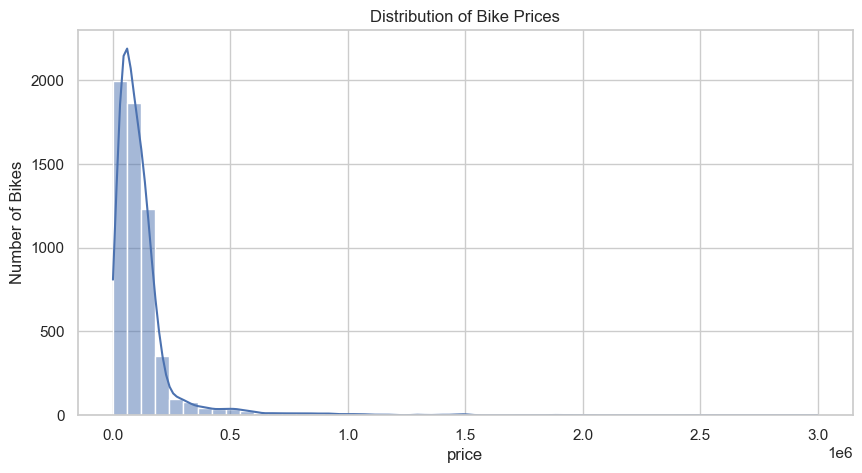

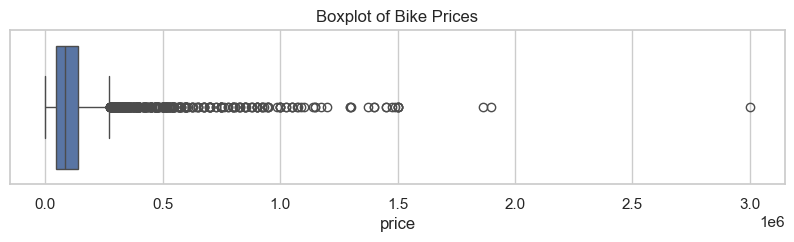

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,5))
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Distribution of Bike Prices")
plt.xlabel("price")
plt.ylabel("Number of Bikes")
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Bike Prices")
plt.show()



In [107]:
df['price']=df['price']*100000

print(df['price'].head())
print(df['price'].min(),df['price'].max())

0     6350000000
1    11500000000
2    30000000000
4    19750000000
5     6340000000
Name: price, dtype: int64
0 300000000000


In [108]:

df['price'] = df['price'] / 100000


print(df['price'].head())
print(df['price'].min(), df['price'].max())


0     63500.0
1    115000.0
2    300000.0
4    197500.0
5     63400.0
Name: price, dtype: float64
0.0 3000000.0


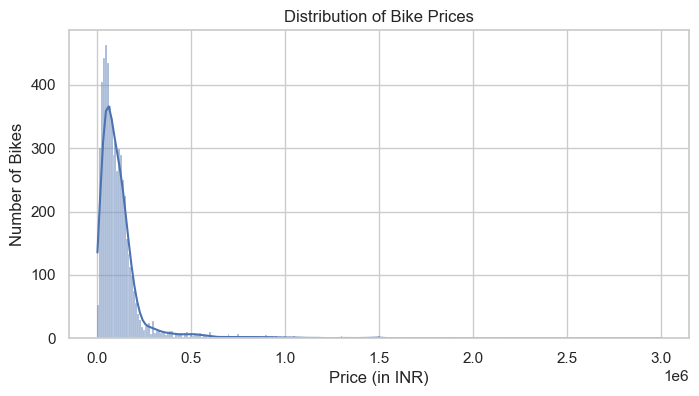

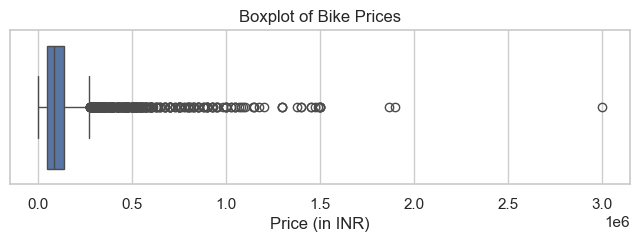

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Bike Prices')
plt.xlabel('Price (in INR)')
plt.ylabel('Number of Bikes')
plt.show()


plt.figure(figsize=(8, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Bike Prices')
plt.xlabel('Price (in INR)')
plt.show()


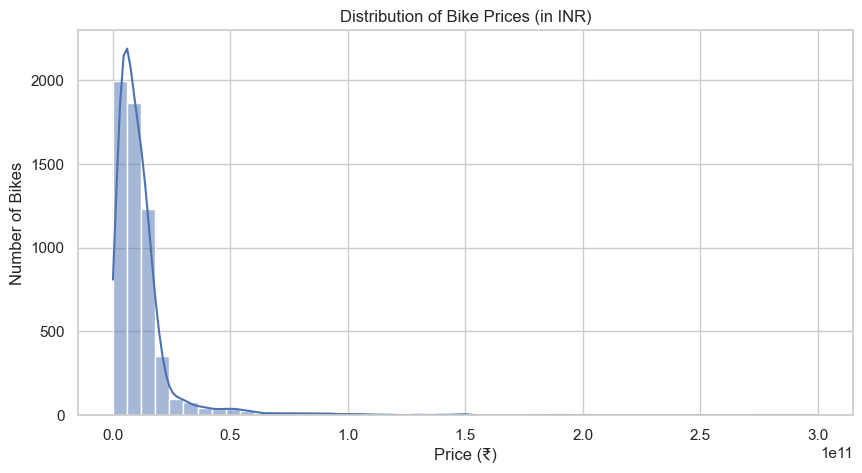

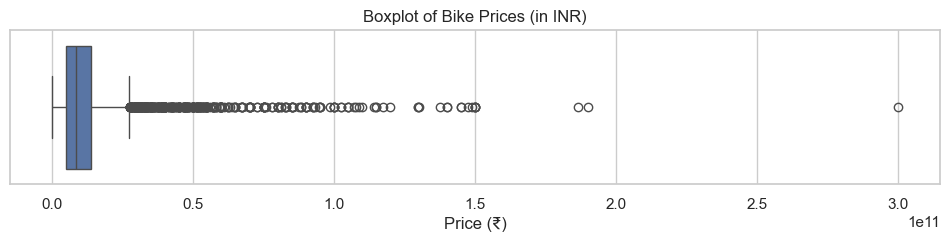

In [110]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'] * 100000, bins=50, kde=True)  
plt.title("Distribution of Bike Prices (in INR)")
plt.xlabel("Price (₹)")
plt.ylabel("Number of Bikes")
plt.show()
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['price'] * 100000)  
plt.title("Boxplot of Bike Prices (in INR)")
plt.xlabel("Price (₹)")
plt.show()

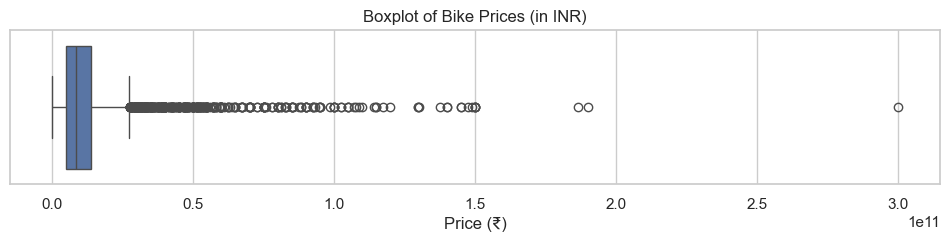

In [111]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['price'] * 100000)  
plt.title("Boxplot of Bike Prices (in INR)")
plt.xlabel("Price (₹)")
plt.show()

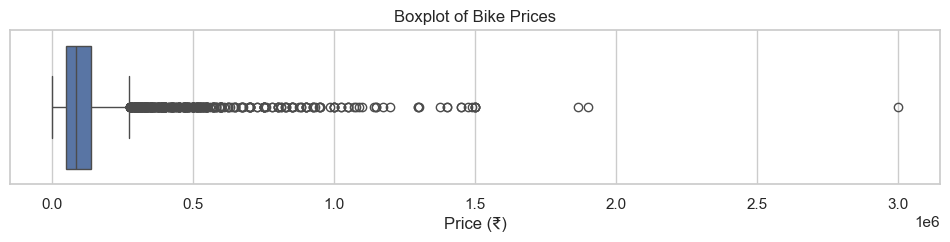

In [112]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Bike Prices")
plt.xlabel("Price (₹)")
plt.show()


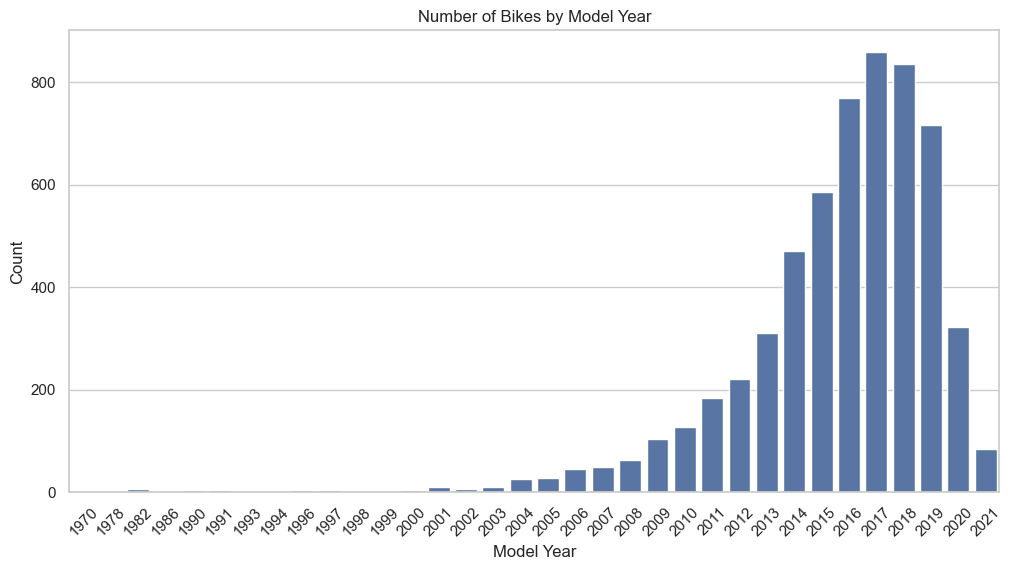

In [113]:
plt.figure(figsize=(12,6))
sns.countplot(x='model_year',data=df,order=sorted(df['model_year'].unique()))
plt.title("Number of Bikes by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_24012\4211730239.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='model_year',y='price',data=df,estimator=np.mean,ci=None)


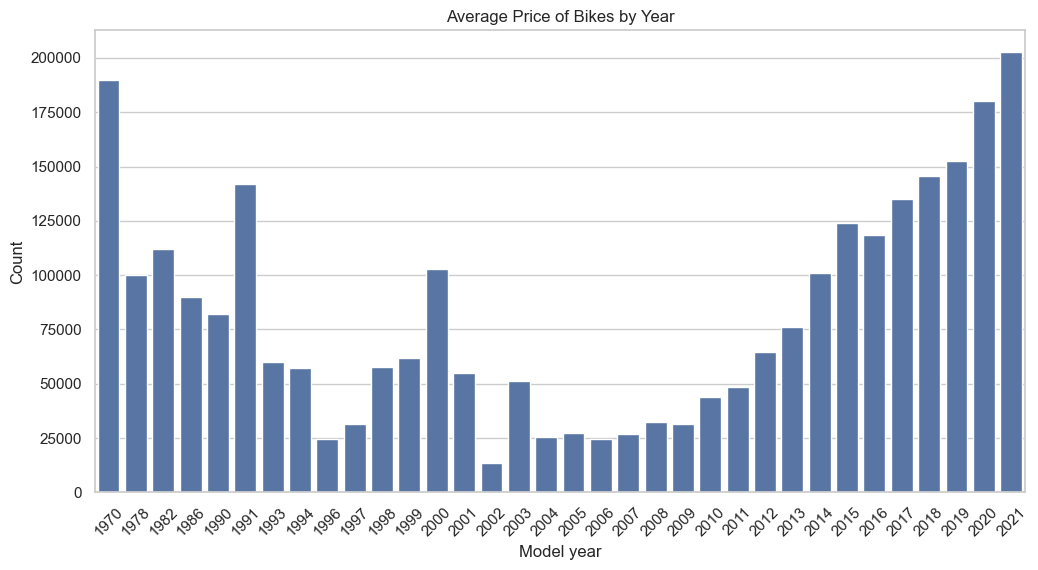

In [114]:
import numpy as np
plt.figure(figsize=(12,6))
sns.barplot(x='model_year',y='price',data=df,estimator=np.mean,ci=None)
plt.title("Average Price of Bikes by Year")
plt.xlabel("Model year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [115]:
print(df['kms_driven'].unique()[:10])


[17000 50000 14795  2000 24561 19718  1350 25000 26240 18866]


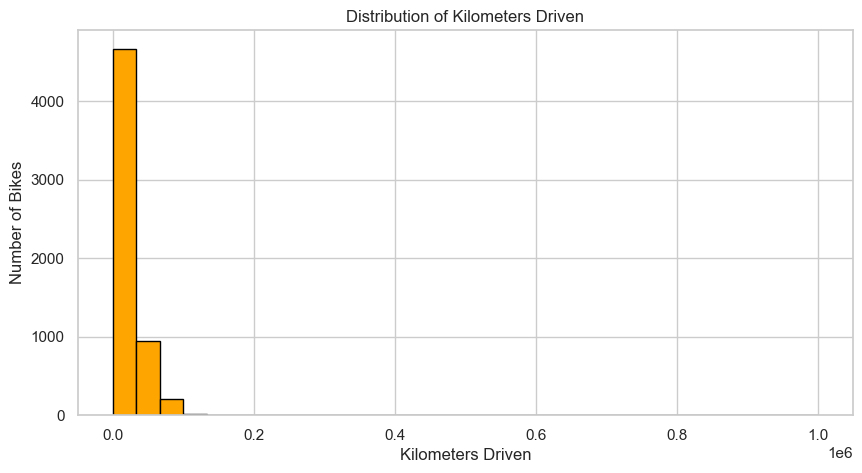

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df['kms_driven'],bins=30,color='orange',edgecolor='black')
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Number of Bikes")
plt.show()

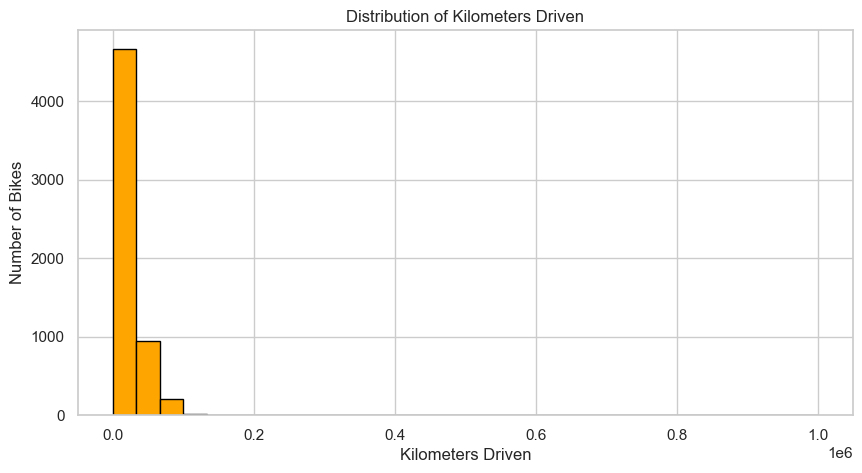

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df['kms_driven'],bins=30,color='orange',edgecolor='black')
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Number of Bikes")
plt.show()

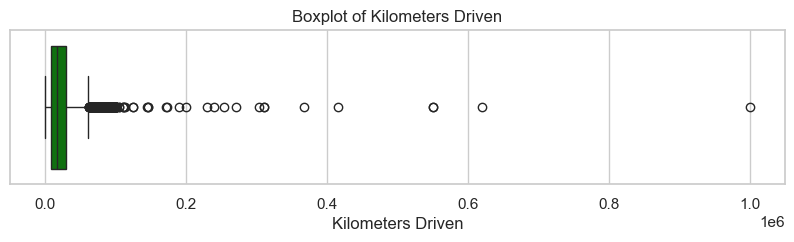

In [118]:
import seaborn as sns
plt.figure(figsize=(10,2))
sns.boxplot(x=df['kms_driven'],color='green')
plt.title("Boxplot of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.show()

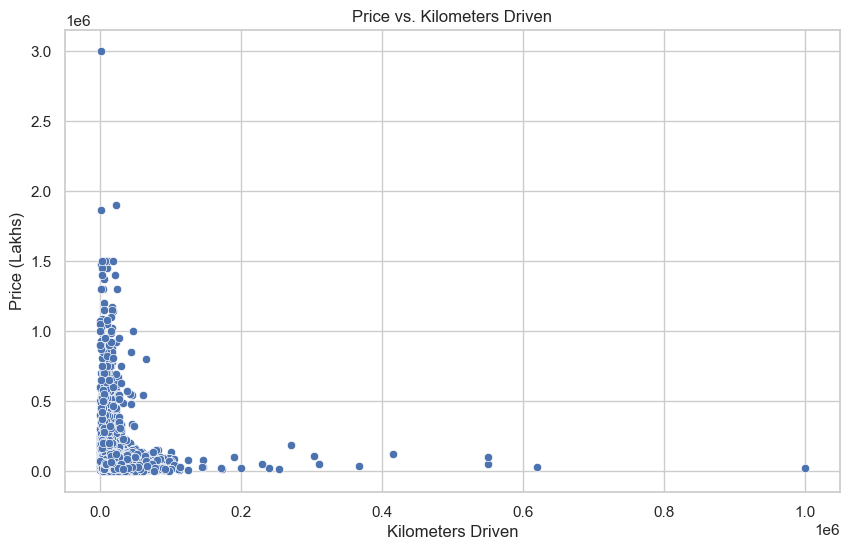

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='price', data=df)
plt.title("Price vs. Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price (Lakhs)")
plt.show()


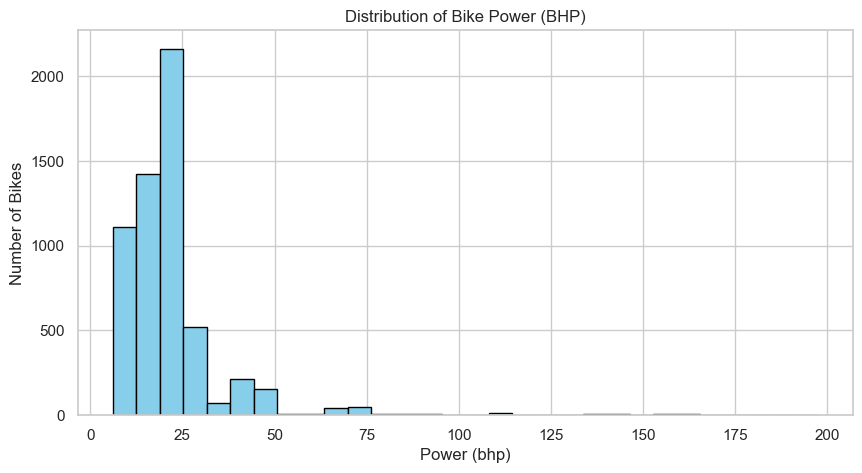

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['power'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Bike Power (BHP)")
plt.xlabel("Power (bhp)")
plt.ylabel("Number of Bikes")
plt.show()


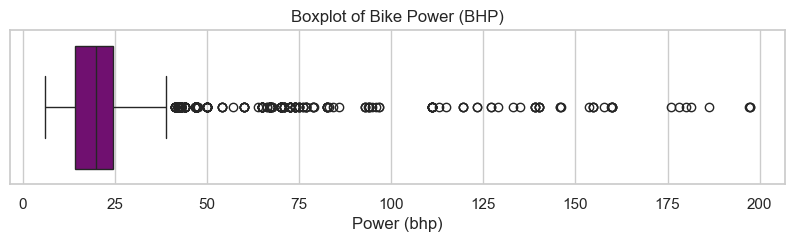

In [121]:
import seaborn as sns

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['power'], color='purple')
plt.title("Boxplot of Bike Power (BHP)")
plt.xlabel("Power (bhp)")
plt.show()


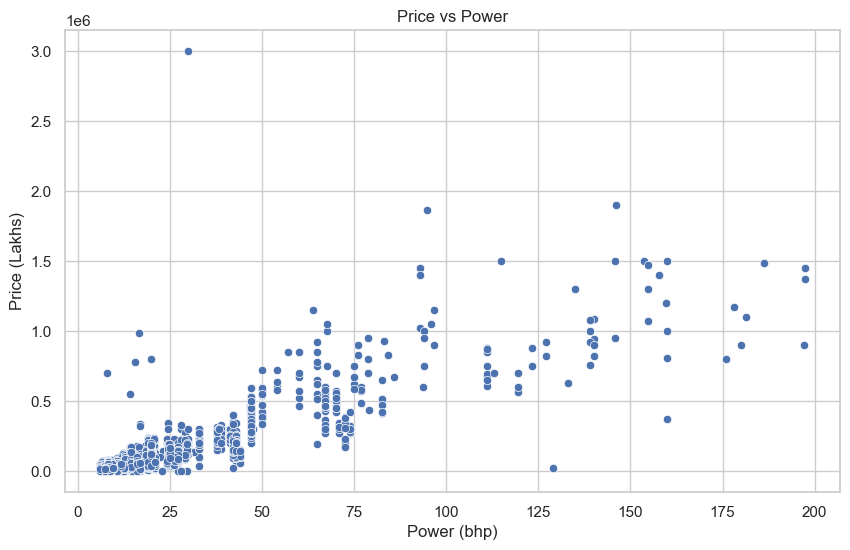

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='power', y='price', data=df)
plt.title("Price vs Power")
plt.xlabel("Power (bhp)")
plt.ylabel("Price (Lakhs)")
plt.show()


In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bikes_cleaned.csv")


numeric_cols=df.select_dtypes(include=['int64','float64'])

correlation_matrix = numeric_cols.corr()

print(correlation_matrix['price'].sort_values(ascending=False))

price         1.000000
power         0.843134
model_year    0.224279
owner        -0.043533
kms_driven   -0.199200
mileage      -0.468901
Name: price, dtype: float64


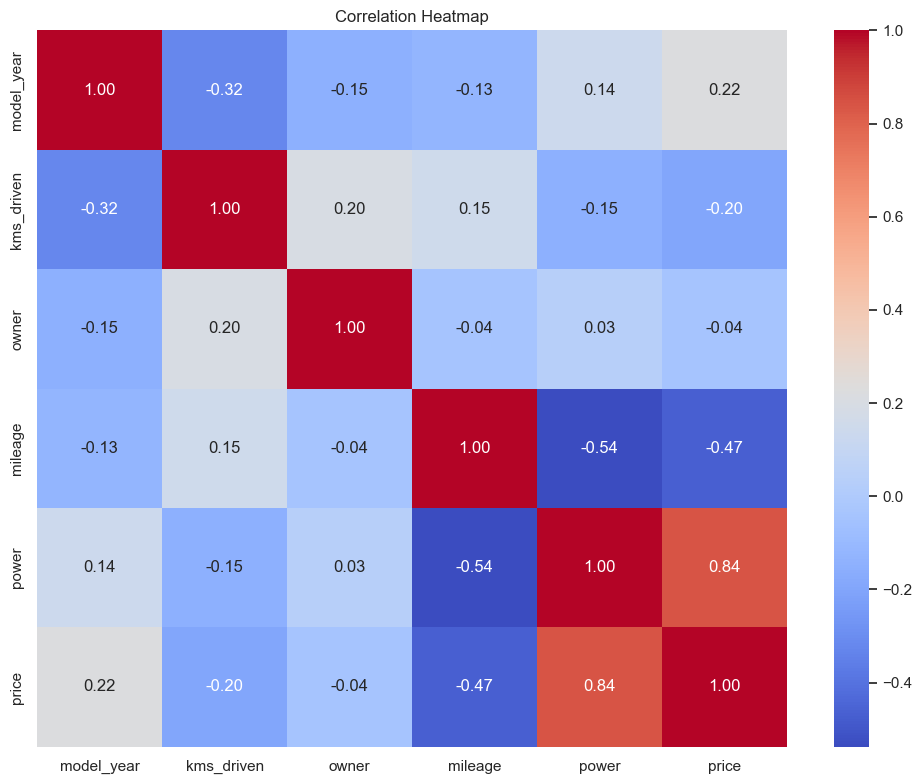

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 🔍 Model Building

Two models were built and evaluated:

1. **Linear Regression**
   - R² Score: 0.73
   - RMSE: 71889.70

2. **Random Forest Regressor**
   - R² Score: 0.77
   - RMSE: 65847.62

The Random Forest model performed better and was chosen for final predictions.


In [125]:
from sklearn.model_selection import train_test_split

X= df[['power','model_year','kms_driven','mileage','owner']]
Y=df['price']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [126]:
print(X.isnull().sum())


power          31
model_year      0
kms_driven      0
mileage       774
owner           0
dtype: int64


In [127]:
X = X.fillna(X.mean())


In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_pred_rf=rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

print("Random Forest R^2 Score:",r2_score(Y_test,Y_pred_rf))
print("Random Forest RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

Random Forest R^2 Score: 0.7765705910839737
Random Forest RMSE: 65847.62240571964


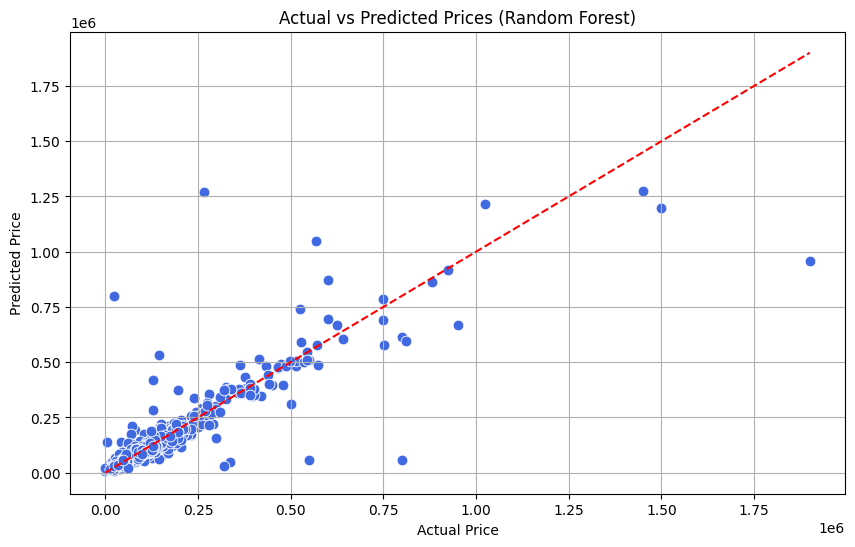

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_test, y=Y_pred_rf, color='royalblue', s=60)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.grid(True)
plt.show()


## 📈 Feature Importance

Using the Random Forest model, we extracted feature importance values. This helped us understand which features influenced the selling price the most.



C:\Users\krish\AppData\Local\Temp\ipykernel_10888\2273986715.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


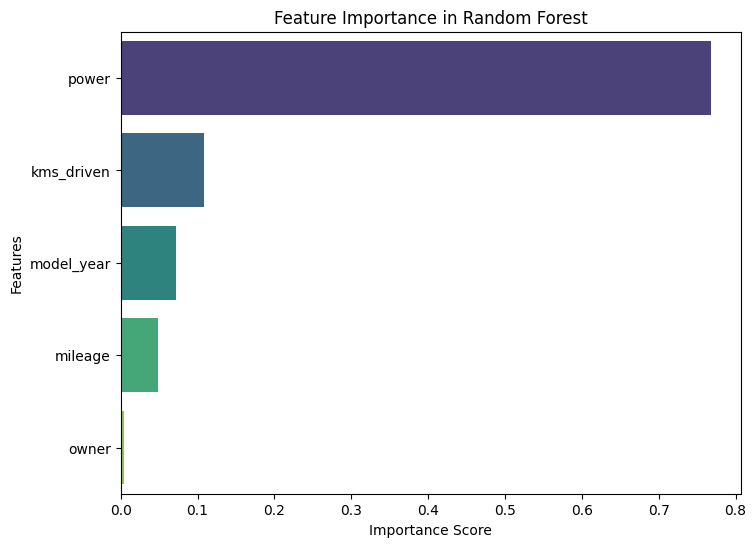

In [ ]:
import pandas as pd

feature_importance = pd.Series(model_rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## ✅ Final Prediction

We can now use the trained Random Forest model to predict the selling price of a used car by inputting new feature values.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)



RandomForestRegressor()

In [ ]:
import numpy as np


test_input = np.array([[11.0, 2016, 45000, 45.0, 0]])  # 

# Predict
predicted_price = model_rf.predict(test_input)

print(f"Predicted Price: ₹ {int(predicted_price[0])}")


Predicted Price: ₹ 46500


c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Another test input: [power, model_year, kms_driven, mileage, owner]
test_input_2 = np.array([[9.0, 2018, 30000, 50.0, 1]])  # e.g., Second owner bike

# Predict
predicted_price_2 = model_rf.predict(test_input_2)

print(f"Predicted Price: ₹ {int(predicted_price_2[0])}")


Predicted Price: ₹ 46279


c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Premium spec: [power, model_year, kms_driven, mileage, owner]
test_input_3 = np.array([[13.5, 2020, 12000, 55.0, 0]])  # Newer bike, high power, first owner

# Predict
predicted_price_3 = model_rf.predict(test_input_3)

print(f"Predicted Price: ₹ {int(predicted_price_3[0])}")


Predicted Price: ₹ 91166


c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Low-spec input: [power, model_year, kms_driven, mileage, owner]
test_input_4 = np.array([[5.0, 2008, 110000, 28.0, 2]])  # Old, worn-out, third owner

# Predict
predicted_price_4 = model_rf.predict(test_input_4)

print(f"Predicted Price: ₹ {int(predicted_price_4[0])}")


Predicted Price: ₹ 23020


c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

joblib.dump(model_rf, 'bike_price_predictor_rf_model.pkl')


['bike_price_predictor_rf_model.pkl']

## 🔚 Project Summary

- 🔍 **Model Used:** Random Forest Regressor
- 📊 **R² Score:** 0.776 — good performance
- 📉 **RMSE:** ₹65,847 — lower error than Linear Regression
- 💡 **Top Features:** Power, Model Year, Mileage
- ✅ **Insights:** Power of the bike has the highest influence on price, while mileage and kms_driven play less significant roles.

This project showcases effective use of machine learning for price prediction using regression models and visualization.


## 🧠 Conclusion

This project successfully demonstrates the use of regression techniques to predict used car prices. With proper preprocessing and model selection, we achieved reasonably good prediction performance. The model can be enhanced further by using more data, additional features, or hyperparameter tuning.

## 📁 Future Work

- Add more bike-specific features (engine capacity, torque, etc.)
- Try more advanced models (XGBoost, CatBoost)
- Deploy the model using a web framework like Flask